### 課題１

|点|オーソリティ度|ハブ度|
|:-:|:-:|:-:|
|1|1/9|5/19|
|2|1/9|3/19|
|3|3/9|3/19|
|4|2/9|3/19|
|5|2/9|5/19|

In [1]:
print(5+3+3+3+5)

19


### 課題２

In [1]:
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from fractions import Fraction
import pandas as pd

In [26]:
a = np.allclose([10.0], [11.0],rtol=0 ,atol=1)
a

True

In [2]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999


In [17]:
def HITS_update(G:nx.classes.digraph.DiGraph, h0, k):
    # 点の数を数える
    n = nx.number_of_nodes(G)

    # 隣接行列Aを作成
    A = nx.to_numpy_array(G, nodelist=range(n), weight=None)

    # Aの転置Atを作成
    At = A.transpose()
    
    # akをNone、hkをh0で初期化
    ak = None
    hk = h0

    # 更新回数を記録する変数を0で初期化する
    count = 0

    # k回更新操作を行う
    for _ in range(k):

        # a(k-1),h(k-1)に前回の反復のak,hkを代入
        ak_dif_1 = ak
        hk_dif_1 = hk
        

        # akとhkを作成する
        ak = At @ hk_dif_1
        hk = A @ ak

        # akとhkのベクトルの要素の和を得る。
        sum_ak = ak.sum(axis=0)[0]
        sum_hk = hk.sum(axis=0)[0]
        
        # 各点のオーソリティ度を全点オーソリティ度で割る
        ak = ak / sum_ak

        # 各点のハブ度を全点ハブ度で割る
        hk = hk / sum_hk

        # 更新回数を1増やす
        count += 1

        # 今回の結果と前回の結果がak, hkどちらも同じなら、ループを抜ける
        if all(ak == ak_dif_1) and all(hk == hk_dif_1):
            break
    print(count)
    return ak, hk


In [21]:
G  = nx.read_edgelist("pr.edgelist", create_using=nx.DiGraph(), nodetype=int)
n = nx.number_of_nodes(G)
h0 = np.ones((n,1))
k=10000
ak, hk = HITS_update(G, h0, k)

print("オーソリティ度: ", *ak)

print("ハブ度: ",*hk)


1655
オーソリティ度:  [0.] [0.] [0.] [0.] [0.03614836] [0.] [0.12123639] [0.] [0.370461] [0.] [0.27862114] [0.19353311]
ハブ度:  [5.e-324] [0.06639415] [0.35546472] [0.01524951] [0.] [0.20742691] [0.] [0.27382106] [0.] [0.08164366] [0.] [0.]


In [4]:
def my_HITS_update(G:nx.classes.digraph.DiGraph, h0, k, TOL):
    n = nx.number_of_nodes(G)

    A = nx.to_numpy_array(G, nodelist=range(n), weight=None)

    At = A.transpose()
    
    ak = None
    hk = h0
    count = 0
    
    for _ in range(k):
        count +=1
        ak_dif_1 = ak
        hk_dif_1 = hk
        
        ak = At @ hk_dif_1
        hk = A @ ak

        sum_ak = ak.sum(axis=0)[0]
        sum_hk = hk.sum(axis=0)[0]
        
        ak = ak / sum_ak
        hk = hk / sum_hk

        
        if  ak_dif_1 is None:
            continue

        # 前回の結果(ak_dif_1, hk_dif_1)と今回の結果(ak, hk)がそれぞれ等しければ、
        # ループを終了させる
        if np.allclose(ak, ak_dif_1,rtol=0 ,atol=TOL) and np.allclose(hk, hk_dif_1,rtol=0, atol=TOL):
            break

    
    return count



In [2]:
G  = nx.read_edgelist("pr.edgelist", create_using=nx.DiGraph(), nodetype=int)
n = nx.number_of_nodes(G)
h0 = np.ones((n,1))
k=10000

In [8]:
left = 0
right = 400
MAX = 1654
count = 0
while (left < right):
    mid = (left + right) //2
    POW = float(f"1e-{mid}")
    count = my_HITS_update(G, h0, k, POW)
    if (count <= MAX):
        left = mid +1
    elif(count >=MAX):
        right = mid
    print(POW, ":", count)

for s in range(left, 400):
    POW = float(f"1e-{s}")
    count = my_HITS_update(G, h0, k, POW)
    print(POW, ":", count)
    if count == 1655:
        break 

1e-200 : 1020
1e-300 : 1532
0.0 : 1655
0.0 : 1655
1e-313 : 1599
1e-319 : 1629
1e-322 : 1645
0.0 : 1655
1e-323 : 1649
0.0 : 1655


In [6]:

MAX = 1654
count = 0
for s in range(1, 10):
    mid = 2 ** s
    POW = float(f"1e-{mid}")
    count = my_HITS_update(G, h0, k, POW)

    print(POW, ":", count)

0.01 : 7
0.0001 : 17
1e-08 : 38
1e-16 : 79
1e-32 : 160
1e-64 : 324
1e-128 : 652
1e-256 : 1307
0.0 : 1655


In [6]:
G  = nx.read_edgelist("pr.edgelist", create_using=nx.DiGraph(), nodetype=int)
n = nx.number_of_nodes(G)
h0 = np.ones((n,1))
resu = []
for s in range(1, 2000):
    k=s
    ak, hk = HITS_update(G, h0, k)
    resu.append([ak, hk])

In [7]:
df_x = []
df_y = []
for t in range(n):
    x = []
    y = []
    for s in resu:
        x.append(s[0][t][0])
        y.append(s[1][t][0])
    df_x.append(x)
    df_y.append(y)


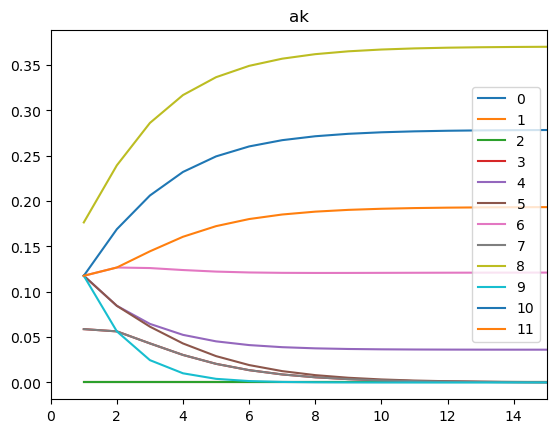

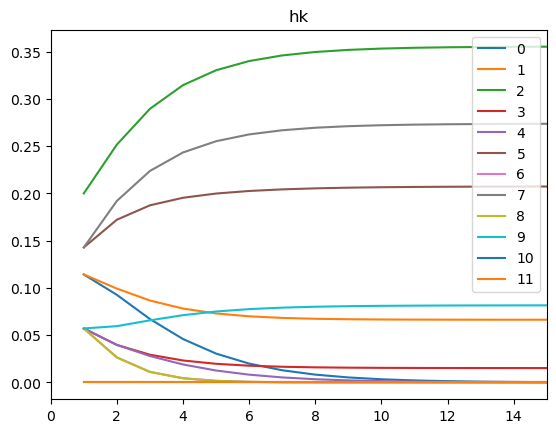

In [8]:
name = {s:s for s in range(n)}
x = list(range(1, 2000))
for s in range(n):
    plt.plot(x, df_x[s], label=name[s])
plt.legend()
plt.title("ak")
plt.xlim(0, 15)
plt.show()

for s in range(n):
    plt.plot(x, df_y[s], label=name[s])
plt.title("hk")
plt.legend()
plt.xlim(0, 15)
plt.show()


In [21]:
ak_diff = []
hk_diff = []
for t in range(n):
    x = []
    y = []
    for m in range(1998):
        x.append(abs(resu[m+1][0][t][0]-resu[m][0][t][0]))
        y.append(abs(resu[m+1][1][t][0]-resu[m][1][t][0]))
    ak_diff.append(x)
    hk_diff.append(y)

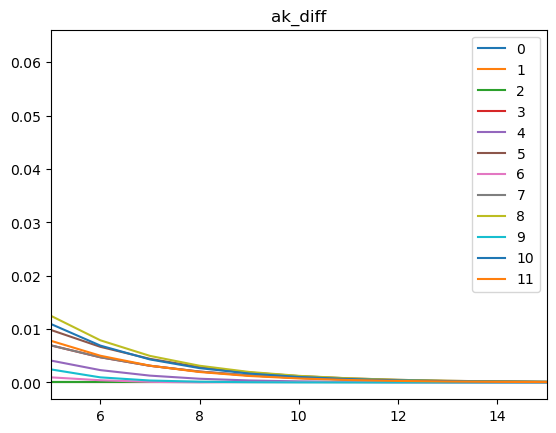

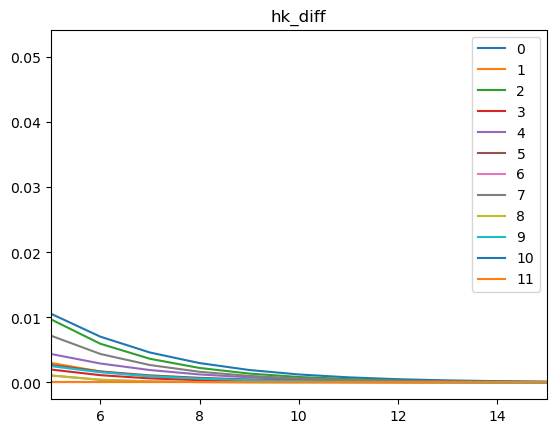

In [69]:
name = {s:s for s in range(n)}
x = list(range(1, 1999))
for s in range(n):
    plt.plot(x, ak_diff[s], label=name[s])
plt.legend()
plt.xlim(5, 15)
plt.title("ak_diff")

plt.show()

for s in range(n):
    plt.plot(x, hk_diff[s], label=name[s])
plt.title("hk_diff")
plt.legend()
plt.xlim(5, 15)

plt.show()




In [80]:

for s in range(9, 14):
    print(s, "回目")
    for t in range(n):
        print(t,": ","{:.10f}".format(ak_diff[t][s]))

9 回目
0 :  0.0000000000
1 :  0.0000000000
2 :  0.0000000000
3 :  0.0008505551
4 :  0.0002001753
5 :  0.0012028667
6 :  0.0000857192
7 :  0.0008505551
8 :  0.0012422438
9 :  0.0000198692
10 :  0.0010409765
11 :  0.0007550819
10 回目
0 :  0.0000000000
1 :  0.0000000000
2 :  0.0000000000
3 :  0.0005454577
4 :  0.0001045426
5 :  0.0007713938
6 :  0.0000752555
7 :  0.0005454577
8 :  0.0007821005
9 :  0.0000074531
10 :  0.0006483735
11 :  0.0004685755
11 回目
0 :  0.0000000000
1 :  0.0000000000
2 :  0.0000000000
3 :  0.0003490684
4 :  0.0000535393
5 :  0.0004936572
6 :  0.0000596876
7 :  0.0003490684
8 :  0.0004927697
9 :  0.0000027914
10 :  0.0004044472
11 :  0.0002912203
12 回目
0 :  0.0000000000
1 :  0.0000000000
2 :  0.0000000000
3 :  0.0002230963
4 :  0.0000267226
5 :  0.0003155058
6 :  0.0000446646
7 :  0.0002230963
8 :  0.0003107511
9 :  0.0000010445
10 :  0.0002527185
11 :  0.0001813314
13 回目
0 :  0.0000000000
1 :  0.0000000000
2 :  0.0000000000
3 :  0.0001424685
4 :  0.0000128612
5 :  0.00

In [44]:
df_ak = pd.DataFrame(ak_diff)
df_hk = pd.DataFrame(hk_diff)
    

In [46]:
columns_mean_ak = df_ak.mean()
columns_mean_hk = df_hk.mean()

0       0.022107
1       0.015156
2       0.009678
3       0.006003
4       0.003690
          ...   
1993    0.000000
1994    0.000000
1995    0.000000
1996    0.000000
1997    0.000000
Length: 1998, dtype: float64


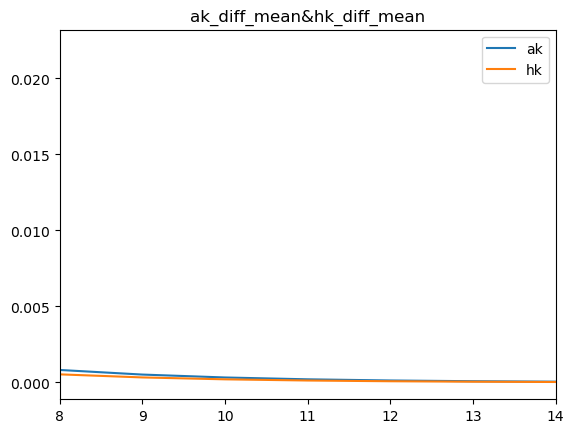

In [59]:
plt.plot(df_ak.columns, columns_mean_ak, label="ak")
plt.plot(df_ak.columns, columns_mean_hk, label = "hk")
plt.title("ak_diff_mean&hk_diff_mean")
plt.xlim(8, 14)
plt.legend()
plt.show()

In [83]:
count = 1
for s in columns_mean_ak[0:20]:
    print(count, "{:.10f}".format(s))
    count+=1

1 0.0220933444
2 0.0169519682
3 0.0121257237
4 0.0080931388
5 0.0052175150
6 0.0033052646
7 0.0020756793
8 0.0013027270
9 0.0008238509
10 0.0005206702
11 0.0003290508
12 0.0002080208
13 0.0001315776
14 0.0000832783
15 0.0000527439
16 0.0000334272
17 0.0000211985
18 0.0000134514
19 0.0000085690
20 0.0000054649
